## 시계열 분해 이해

In [ ]:
# 추세 요인 (Trend factor)
# 순환 요인 (Cycle factor) 
# 계절 요인 (Seasonal factor) 
# 불규칙 요인 (Irregular factor)

In [ ]:
# 가법모형Additive Model :Yt = Tt + Ct + St + It
# -->  주로 추세와 계절성이 시간의 흐름에 따라 일정한 크기로 변하는 경우에 사용 (변동폭이 일정한 경우에 적합)

# Multiplicative Model (승법 모델) Yt = Tt * Ct * St * It
# 추세나 계절성이 시간의 흐름에 따라 비율적으로 증가 또는 감소하는 경우에 사용 (주로 시간에 따라 크기가 변동하는 계절성이나 추세가 있는 경우에 사용)
 

In [41]:
import pandas as pd
import numpy as np

In [42]:
# 날짜데이터 생성
dates = pd.date_range('2018-01-01', periods=48, freq='M')
dates

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [43]:
# 추세 요인 (Trend factor)
# 순환 요인 (Cycle factor) 
# 계절 요인 (Seasonal factor) 
# 불규칙 요인 (Irregular / Random factor, Noise)


# additive model: trend + cycle + seasonality + irregular factor
timestamp = np.arange(len(dates))
trend_factor = timestamp*1.1
cycle_factor = 10*np.sin(np.linspace(0, 3.14*2, 48))
seasonal_factor = 7*np.sin(np.linspace(0, 3.14*8, 48))
np.random.seed(2004)
irregular_factor = 2*np.random.randn(len(dates))
df = pd.DataFrame({'timeseries': trend_factor + cycle_factor + seasonal_factor + irregular_factor,'trend': trend_factor,'cycle': 
                   cycle_factor,'seasonal': seasonal_factor,'irregular': irregular_factor},index=dates)
df


,timeseries,trend,cycle,seasonal,irregular
2018-01-31,2.596119,0.0,0.000000,0.000000,2.596119
2018-02-28,6.746160,1.1,1.332198,3.565684,0.748278
2018-03-31,8.112100,2.2,2.640647,6.136825,-2.865371
2018-04-30,8.255941,3.3,3.902021,6.996279,-5.942358
2018-05-31,16.889655,4.4,5.093834,5.904327,1.491495
2018-06-30,16.182357,5.5,6.194839,3.165536,1.321981
2018-07-31,14.128087,6.6,7.185409,-0.456187,0.798865
2018-08-31,11.943313,7.7,8.047886,-3.950671,0.146099
2018-09-30,9.728095,8.8,8.766892,-6.343231,-1.495567
2018-10-31,12.483489,9.9,9.329612,-6.966533,0.220411


## 시각화

In [45]:
# 시간도표 (time series plot)
# '양(+)의 1차 선형 추세 (linear trend)', '1년 단위의 계절성(seasonality)', 그리고 불규칙한 잡음(noise)을 눈으로 확인 


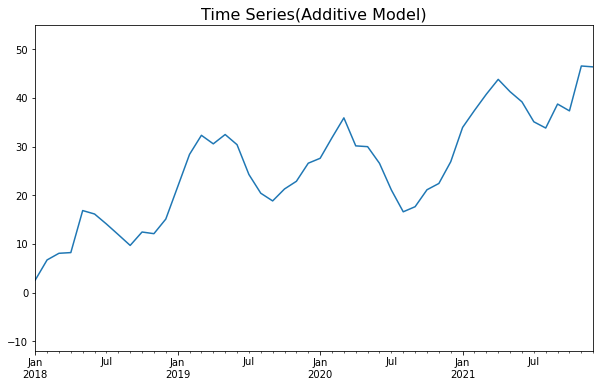

In [46]:
# Time series plot
import matplotlib.pyplot as plt

plt.figure(figsize=[10,6])
df.timeseries.plot()
plt.title('Time Series(Additive Model)', fontsize=16)
plt.ylim(-12,55)
plt.show()


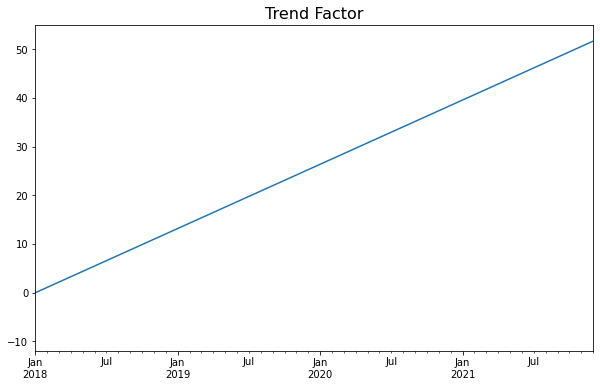

In [47]:
# -- Trend factor
#timestamp = np.arange(len(dates))
#trend_factor = timestamp*1.1


plt.figure(figsize=[10,6])
df.trend.plot()
plt.title('Trend Factor', fontsize=16)
plt.ylim(-12,55)
plt.show()


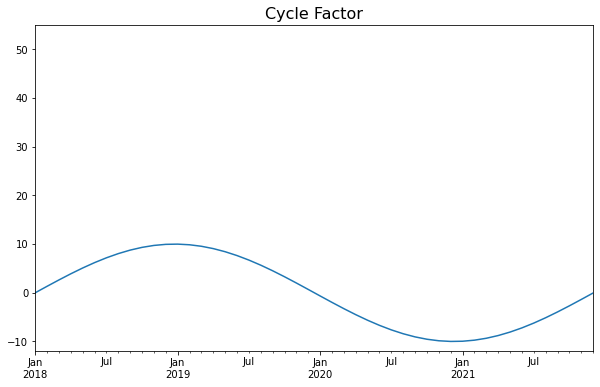

In [48]:
# -- Cycle factor
#cycle_factor = 10*np.sin(np.linspace(0, 3.14*2, 48))

plt.figure(figsize=[10,6])
df.cycle.plot()
plt.title('Cycle Factor', fontsize=16)
plt.ylim(-12,55)
plt.show()


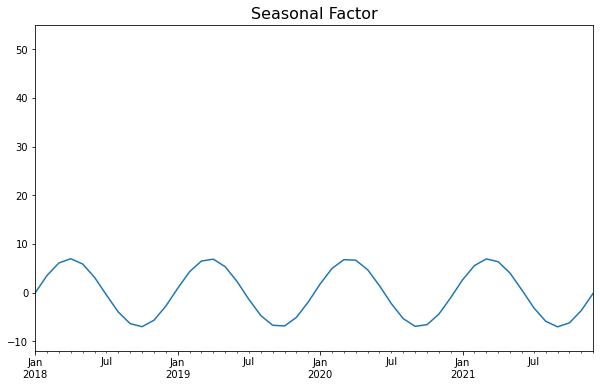

In [49]:
# -- Seasonal factor
#seasonal_factor = 7*np.sin(np.linspace(0, 3.14*8, 48))


plt.figure(figsize=[10,6])
df.seasonal.plot()
plt.title('Seasonal Factor', fontsize=16)
plt.ylim(-12,55)
plt.show()


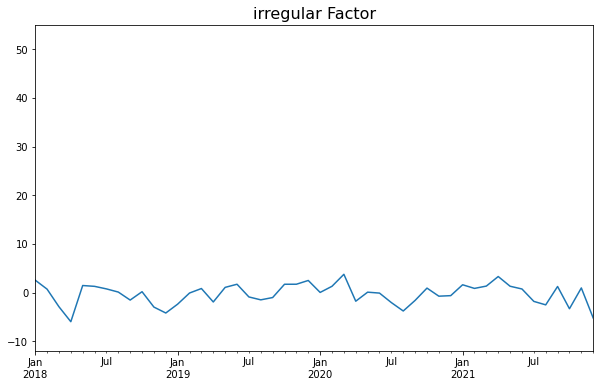

In [50]:
# -- Irregular/ Random factor
# #np.random.seed(2004)
# #irregular_factor = 2*np.random.randn(len(dates))

plt.figure(figsize=[10,6])
df.irregular.plot()
plt.title('irregular Factor', fontsize=16)
plt.ylim(-12,55)
plt.show()


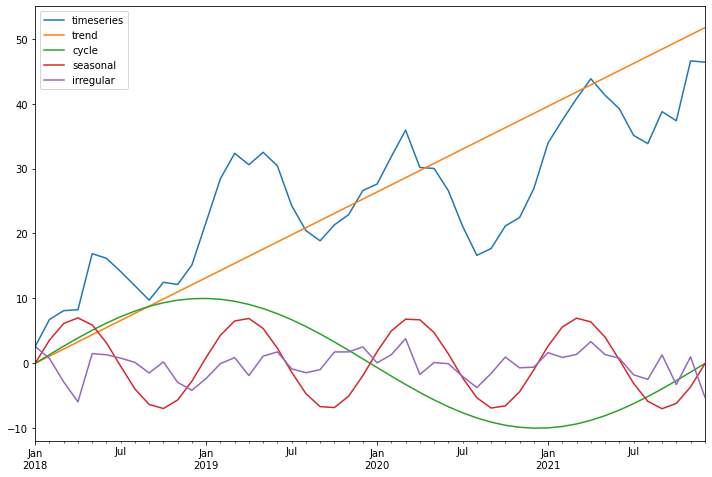

In [51]:
# All in one: Time series = Trend factor + Cycle factor + Seasonal factor + Irregular factor
# 요인 그래프 한번에 표현하기

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df.plot()
plt.ylim(-12, 55)
plt.show()


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dates = pd.date_range('2018-01-01', periods=48, freq='M')
dates


DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [53]:
# additive model: trend + cycle + seasonality + irregular factor
timestamp = np.arange(len(dates))
trend_factor = timestamp*1.1
cycle_factor = 10*np.sin(np.linspace(0, 3.14*2, 48))
seasonal_factor = 7*np.sin(np.linspace(0, 3.14*8, 48))
np.random.seed(2004)
irregular_factor = 2*np.random.randn(len(dates))
df = pd.DataFrame({'timeseries': trend_factor + cycle_factor + seasonal_factor + irregular_factor,
    'trend': trend_factor,
    'cycle': cycle_factor,
    'trend_cycle': trend_factor + cycle_factor,'seasonal': seasonal_factor,
    'irregular': irregular_factor},index=dates)
df


,timeseries,trend,cycle,trend_cycle,seasonal,irregular
2018-01-31,2.596119,0.0,0.000000,0.000000,0.000000,2.596119
2018-02-28,6.746160,1.1,1.332198,2.432198,3.565684,0.748278
2018-03-31,8.112100,2.2,2.640647,4.840647,6.136825,-2.865371
2018-04-30,8.255941,3.3,3.902021,7.202021,6.996279,-5.942358
2018-05-31,16.889655,4.4,5.093834,9.493834,5.904327,1.491495
2018-06-30,16.182357,5.5,6.194839,11.694839,3.165536,1.321981
2018-07-31,14.128087,6.6,7.185409,13.785409,-0.456187,0.798865
2018-08-31,11.943313,7.7,8.047886,15.747886,-3.950671,0.146099
2018-09-30,9.728095,8.8,8.766892,17.566892,-6.343231,-1.495567
2018-10-31,12.483489,9.9,9.329612,19.229612,-6.966533,0.220411


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2018-01-31 to 2021-12-31
Freq: M
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timeseries   48 non-null     float64
 1   trend        48 non-null     float64
 2   cycle        48 non-null     float64
 3   trend_cycle  48 non-null     float64
 4   seasonal     48 non-null     float64
 5   irregular    48 non-null     float64
dtypes: float64(6)
memory usage: 2.6 KB


## Python을 이용한 시계열 분해 (Time series decomposition using Python)


### statsmodels의 seasonal_decompose 모델

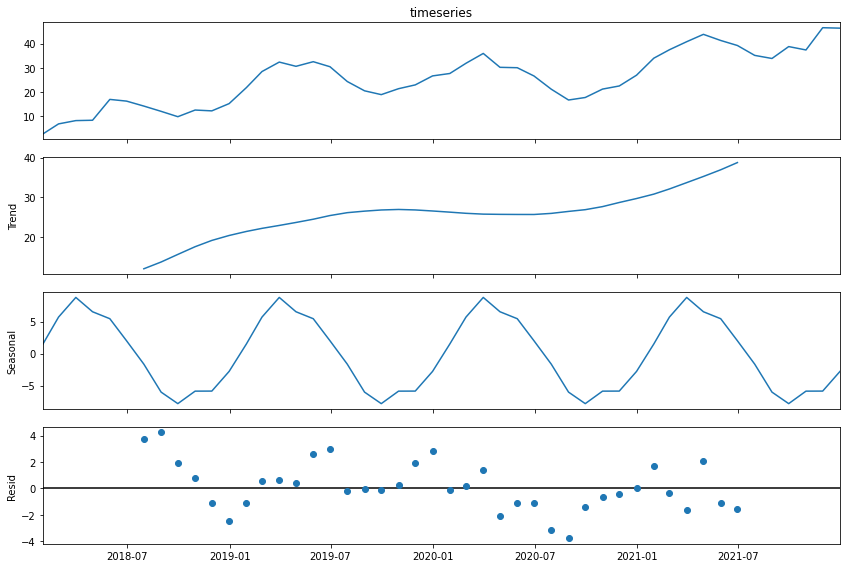

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = df.timeseries
result = seasonal_decompose(ts, model='additive')

plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()

In [56]:
# 원래의 시계열 구성요소(추세+순환, 계절성, 불규칙 요인) +
# 시계열 분해(time series decomposition)를 통해 분리한 추세(&순환), 계절성, 잔차(불규칙 요인)
#  --> 합쳐서 시각화                                                                                                                 원래 데이터의 불규칙 요인과 시계열 분해를 통해 분리한 잔차를 겹쳐서 그려봄)

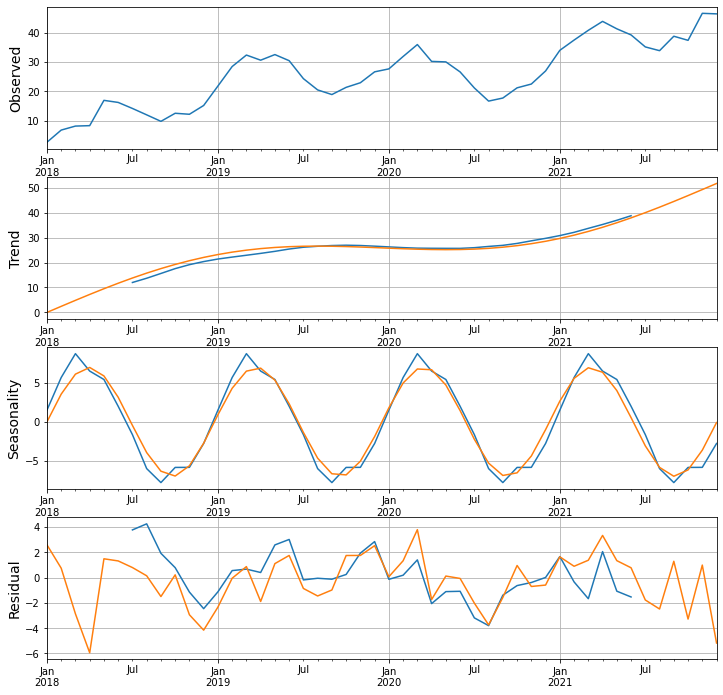

In [57]:
# ground truth & timeseries decompostion all together
# -- observed data
plt.figure(figsize=(12, 12))
plt.subplot(4,1, 1)
result.observed.plot()
plt.grid(True)
plt.ylabel('Observed', fontsize=14)

# -- trend & cycle factor
plt.subplot(4, 1, 2)
result.trend.plot()# from timeseries decomposition
df.trend_cycle.plot()  # ground truth
plt.grid(True)
plt.ylabel('Trend', fontsize=14)


# -- seasonal factor
plt.subplot(4, 1, 3)
result.seasonal.plot() # from timeseries decomposition
df.seasonal.plot()  # ground truth
plt.grid(True)
plt.ylabel('Seasonality', fontsize=14)


# -- irregular factor (noise)
plt.subplot(4, 1, 4)
result.resid.plot()  # from timeseries decomposition
df.irregular.plot()  # ground truth
plt.grid(True)
plt.ylabel('Residual', fontsize=14)
plt.show()


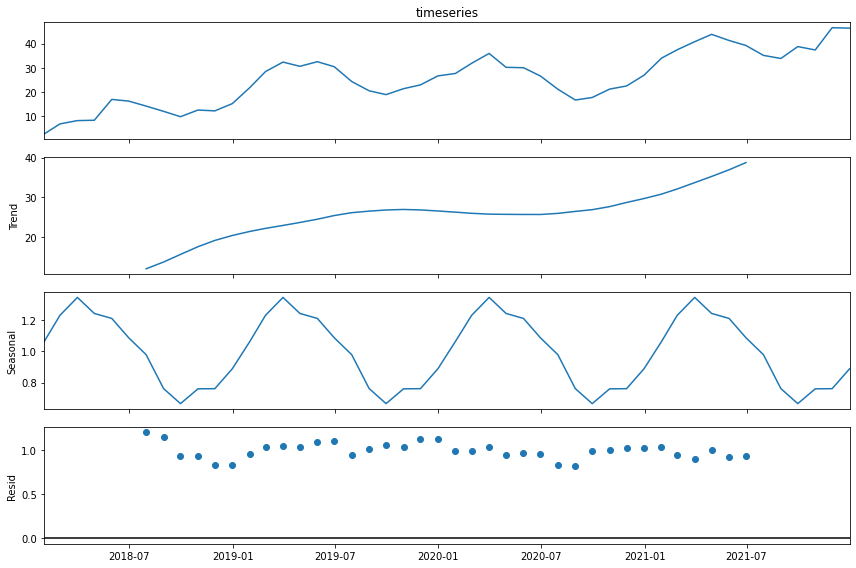

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose


ts = df.timeseries
result = seasonal_decompose(ts, model='multiplicative')

plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()


In [59]:
ts

2018-01-31     2.596119
2018-02-28     6.746160
2018-03-31     8.112100
2018-04-30     8.255941
2018-05-31    16.889655
2018-06-30    16.182357
2018-07-31    14.128087
2018-08-31    11.943313
2018-09-30     9.728095
2018-10-31    12.483489
2018-11-30    12.141808
2018-12-31    15.143334
2019-01-31    21.774516
2019-02-28    28.432892
2019-03-31    32.350583
2019-04-30    30.596556
2019-05-31    32.510523
2019-06-30    30.425519
2019-07-31    24.300958
2019-08-31    20.450917
2019-09-30    18.870881
2019-10-31    21.326310
2019-11-30    22.902448
2019-12-31    26.620578
2020-01-31    27.626499
2020-02-29    31.858923
2020-03-31    35.930469
2020-04-30    30.177870
2020-05-31    30.016165
2020-06-30    26.591729
2020-07-31    21.118481
2020-08-31    16.636031
2020-09-30    17.682613
2020-10-31    21.163298
2020-11-30    22.455672
2020-12-31    26.919529
2021-01-31    33.964623
2021-02-28    37.459776
2021-03-31    40.793766
2021-04-30    43.838415
2021-05-31    41.301780
2021-06-30    39

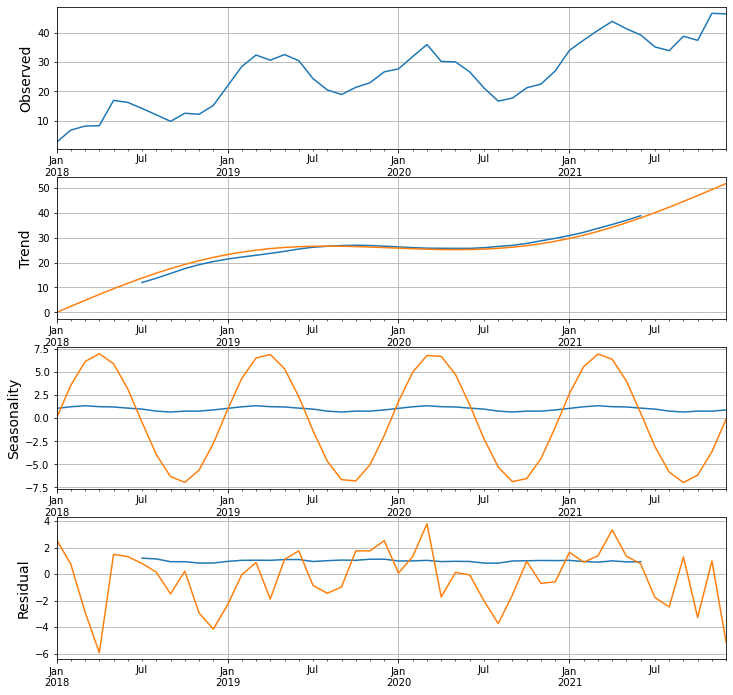

In [60]:
# ground truth & timeseries decompostion all together
# -- observed data
plt.figure(figsize=(12, 12))
plt.subplot(4,1, 1)
result.observed.plot()
plt.grid(True)
plt.ylabel('Observed', fontsize=14)

# -- trend & cycle factor
plt.subplot(4, 1, 2)
result.trend.plot()# from timeseries decomposition
df.trend_cycle.plot()  # ground truth
plt.grid(True)
plt.ylabel('Trend', fontsize=14)


# -- seasonal factor
plt.subplot(4, 1, 3)
result.seasonal.plot() # from timeseries decomposition
df.seasonal.plot()  # ground truth
plt.grid(True)
plt.ylabel('Seasonality', fontsize=14)


# -- irregular factor (noise)
plt.subplot(4, 1, 4)
result.resid.plot()  # from timeseries decomposition
df.irregular.plot()  # ground truth
plt.grid(True)
plt.ylabel('Residual', fontsize=14)
plt.show()


## 주가데이터를 이용한 시계열 분해(삼성전자)

In [61]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr

ss = fdr.DataReader("005930")
ss

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-08-18,3600,3760,3540,3680,695577,NaN
1999-08-19,3720,3760,3560,3560,509661,-0.032609
1999-08-20,3560,3560,3460,3520,529333,-0.011236
1999-08-23,3590,3740,3560,3700,674482,0.051136
1999-08-24,3800,3879,3730,3850,794226,0.040541
...,...,...,...,...,...,...
2023-11-29,72400,72800,72200,72700,9283933,0.000000
2023-11-30,72700,72800,72200,72800,15783714,0.001376
2023-12-01,72400,72500,71700,72000,9871284,-0.010989


In [62]:
# 첫번 째 주가데이터는 공휴일이 포함되어있기 때문에 시계열 분해로서 진행이안됨 
# 그래서 공휴일 데이터를 넣어서 공휴일 때 기준 가장 최근데이터로 데이터를 표현


# DatetimeIndex 생성
# 시작 날짜와 종료 날짜를 직접 지정
start_date = '2018-01-01'
end_date = '2023-12-04'

# 주어진 시작 날짜부터 종료 날짜까지의 날짜 범위 생성
dates = pd.date_range(start=start_date, end=end_date, freq='D')
df = pd.DataFrame(index=dates)
df

""
2018-01-01
2018-01-02
2018-01-03
2018-01-04
2018-01-05
...
2023-11-30
2023-12-01
2023-12-02
2023-12-03


In [63]:
# 주가 데이터와 일별데이터 합하기
a = pd.concat([ss,df],axis=1)
a

,Open,High,Low,Close,Volume,Change
1999-08-18,3600.0,3760.0,3540.0,3680.0,695577.0,NaN
1999-08-19,3720.0,3760.0,3560.0,3560.0,509661.0,-0.032609
1999-08-20,3560.0,3560.0,3460.0,3520.0,529333.0,-0.011236
1999-08-23,3590.0,3740.0,3560.0,3700.0,674482.0,0.051136
1999-08-24,3800.0,3879.0,3730.0,3850.0,794226.0,0.040541
...,...,...,...,...,...,...
2023-12-01,72400.0,72500.0,71700.0,72000.0,9871284.0,-0.010989
2023-12-02,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-03,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-04,72800.0,72900.0,72400.0,72600.0,10229267.0,0.008333


In [64]:
# NaN값을 NaN값기준 가장 과 데이터로 채우기 
a.fillna(method='ffill',inplace=True)

In [65]:
a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6704 entries, 1999-08-18 to 2023-12-05
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6704 non-null   float64
 1   High    6704 non-null   float64
 2   Low     6704 non-null   float64
 3   Close   6704 non-null   float64
 4   Volume  6704 non-null   float64
 5   Change  6703 non-null   float64
dtypes: float64(6)
memory usage: 366.6 KB


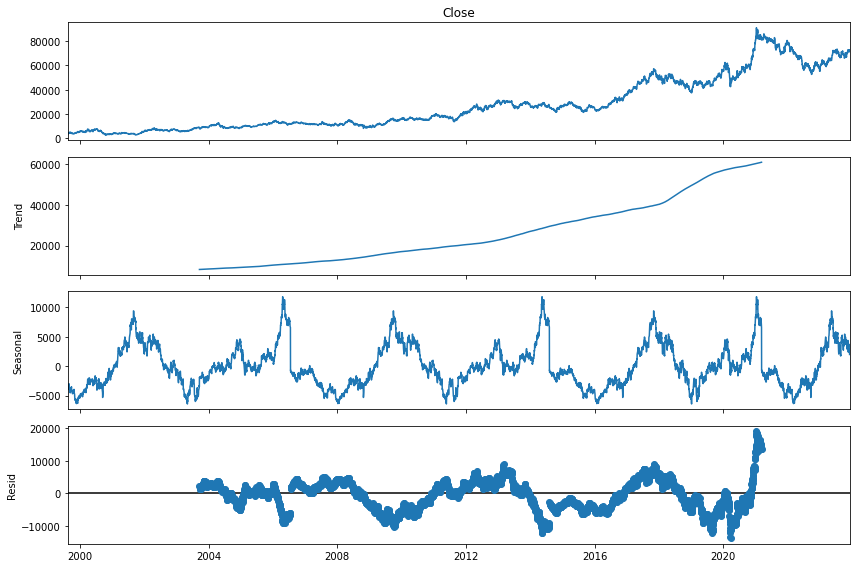

In [66]:
# 시계열 분해 작업
from statsmodels.tsa.seasonal import seasonal_decompose

#period:계절성의 주기를 나타냅니다. 주기를 지정하지 않으면 자동으로 감지하려고 시도합니다. 
ss_ts = a.Close
result = seasonal_decompose(ss_ts, model='additive',period=2000)

plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()


In [67]:
# 2번 째 월별로 데이터를 변경해서 해보기
import pandas as pd
import numpy as np
import FinanceDataReader as fdr

ss = fdr.DataReader("005930")
ss.drop("Change",axis=1, inplace=True)
ss.reset_index(inplace=True)
ss



,Date,Open,High,Low,Close,Volume
0,1999-08-18,3600,3760,3540,3680,695577
1,1999-08-19,3720,3760,3560,3560,509661
2,1999-08-20,3560,3560,3460,3520,529333
3,1999-08-23,3590,3740,3560,3700,674482
4,1999-08-24,3800,3879,3730,3850,794226
...,...,...,...,...,...,...
5995,2023-11-29,72400,72800,72200,72700,9283933
5996,2023-11-30,72700,72800,72200,72800,15783714
5997,2023-12-01,72400,72500,71700,72000,9871284
5998,2023-12-04,72800,72900,72400,72600,10229267


In [68]:
# 월말 데이터로 변경하기 위한 Group by 이용 데이터 수정
how = {
    'Open' : 'first',
    'High' : 'max',
    'Low' : 'min',
    'Close' : 'last',
    'Volume' : 'sum'

}
ss_month = ss.groupby(pd.Grouper(key='Date',freq='m')).agg(how)
ss_month

,Open,High,Low,Close,Volume
Date,,,,,
1999-08-31,3600,4660,3460,4480,9023909
1999-09-30,4600,5040,3939,3940,24042478
1999-10-31,3940,4260,3509,4000,17350116
1999-11-30,4200,4900,4100,4800,15993071
1999-12-31,4750,5720,4710,5320,19110002
...,...,...,...,...,...
2023-08-31,70100,71200,65800,66900,258464791
2023-09-30,66800,72900,66700,68400,283534308
2023-10-31,67400,70500,66000,66900,290080133


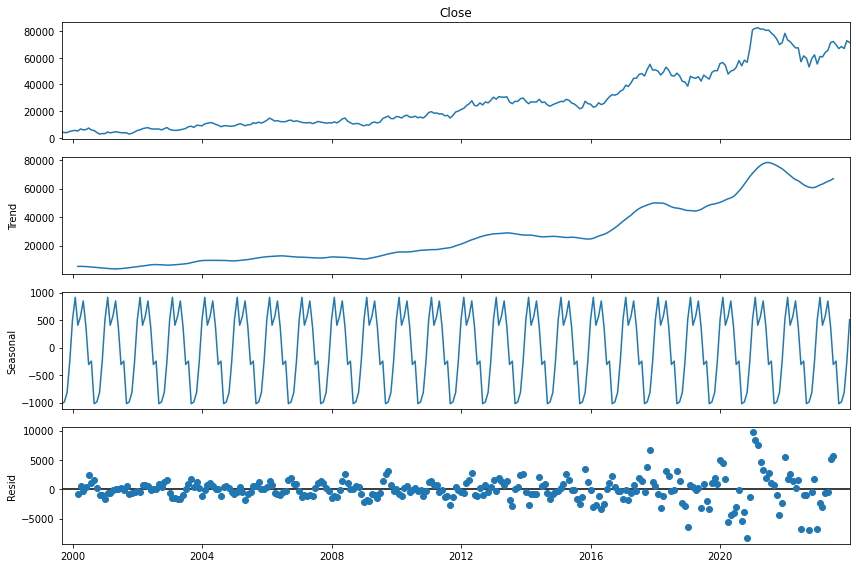

In [69]:
# 시계열 분해 코드
from statsmodels.tsa.seasonal import seasonal_decompose

# additive
ss_ts = ss_month.Close
result = seasonal_decompose(ss_ts, model='additive')

plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()


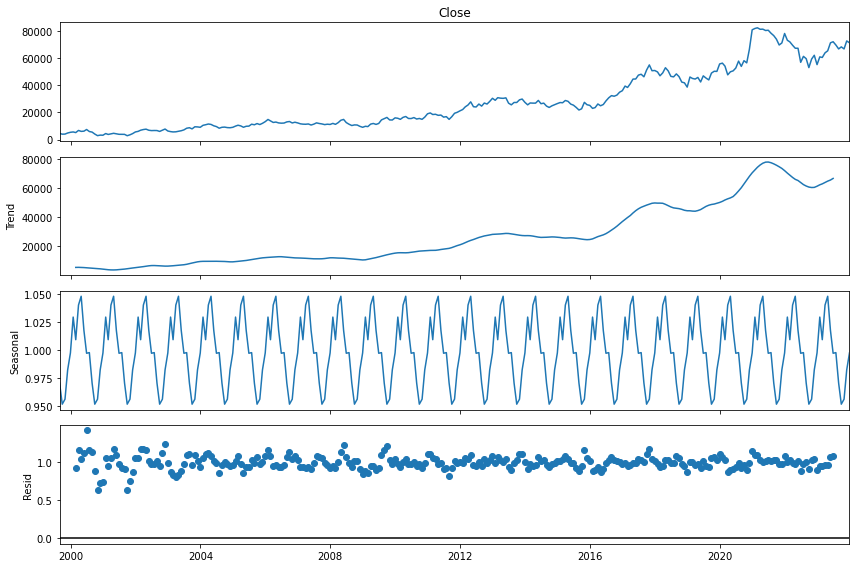

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

# multiplicative
ss_ts = ss_month.Close
result = seasonal_decompose(ss_ts, model='multiplicative')

plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()
